In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
DISABLE_LEGEND = True
WRITE_TO_FILE = True

In [2]:
scores_files = ["sc_fair.csv", "sc_adamic_adar.csv", "sc_jaccard_coefficient.csv",
                "sc_preferential_attachment.csv", "sc_node2vec.csv", "sc_fairwalk.csv", "sc_hybrid_node2vec.csv",
                "sc_dyadic_fair.csv"]
accept_prob_files = ["accept_prob_fair.csv", "accept_prob_node2vec.csv", "accept_prob_fairwalk.csv",
                     "accept_prob_hybrid_node2vec.csv"]
NAMES = {"sc_fair.csv": "FREC", "sc_adamic_adar.csv": "ADA", "sc_jaccard_coefficient.csv" : "JC",
                "sc_preferential_attachment.csv": "PA", "sc_node2vec.csv": "n2v", 
         "sc_fairwalk.csv": "FairWalk", "sc_hybrid_node2vec.csv": "E_FREC", "sc_dyadic_fair.csv": "Balanced",
        "sc_random.csv": "Rnd"}

In [3]:
figure2_files = ["sc_preferential_attachment.csv", "sc_jaccard_coefficient.csv", "sc_adamic_adar.csv",
                 "sc_node2vec.csv", "sc_random.csv"]
figure2_prob_files = ["accept_prob_preferential_attachment.csv", "accept_prob_jaccard_coefficient.csv", 
                      "accept_prob_adamic_adar.csv",
                 "accept_prob_node2vec.csv", "accept_prob_random.csv"]
figure4_files = ["sc_fair.csv", "sc_hybrid_node2vec.csv", "sc_node2vec.csv", "sc_fairwalk.csv"]
figure4_prob_files = ["accept_prob_fair.csv", "accept_prob_hybrid_node2vec.csv", "accept_prob_node2vec.csv",
                     "accept_prob_fairwalk.csv"]
markers = ["s","o", "D", "*", "X"]
figure_personalized_names = ["FREC", "E_FREC", "PREC", "E_PREC", "n2v", "FairWalk"]

In [4]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

class ScalarFormatterClass(ScalarFormatter):
    def _set_format(self):
        self.format = "%0.2f"

In [158]:
def plot_scores(dataset, scores_files, prune_first: bool = True):
    i = 0
    for sf in scores_files:
        df = pd.read_csv(dataset + "/" + sf)
        if prune_first:
            df = df.iloc[0: , :]
        name = sf.split(".")[0].split("_")[1]
        for n in NAMES.keys():
            if name in n:
                name = NAMES[n]
                break
        plt.plot(df["Rounds"], df["Scores"], label=name, linestyle=':', marker=markers[i], ms=8)
        plt.ylabel('Score', fontsize=15)
        plt.xlabel('Round', fontsize=15)
        plt.xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 
                   fontsize=15)
        plt.yticks(fontsize=12)
        plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 5)
        if DISABLE_LEGEND:
            plt.legend('', frameon=False)
        ax = plt.gca()
        yScalarFormatter = ScalarFormatterClass(useMathText=True)
        ax.yaxis.set_major_formatter(yScalarFormatter)
        tmp = "_our_algo" if not prune_first else "_rec"
        if WRITE_TO_FILE:
            plt.savefig("figures/" + dataset + "_score" + tmp + ".png", dpi=None, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)
        i+= 1
        
def plot_accept_prob(dataset, accept_prob_files, prune_first: bool = True):
    i = 0
    for sf in accept_prob_files:
        df = pd.read_csv(dataset + "/" + sf)
        if prune_first:
            df = df.iloc[0: , :]
        name = sf.split(".")[0].split("_")[2]
        for n in NAMES.keys():
            if name in n:
                name = NAMES[n]
                break
        plt.plot(df["Rounds"], df["Acceptance_prob"], label=name, linestyle=':', marker=markers[i], ms=8)
        plt.ylabel('Acceptance Probability', fontsize=15)
        plt.xlabel('Round', fontsize=15)
        plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=15)
        plt.yticks(fontsize=12)
        plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 5)
        if DISABLE_LEGEND:
            plt.legend('', frameon=False)
        ax = plt.gca()
        yScalarFormatter = ScalarFormatterClass(useMathText=True)
        ax.yaxis.set_major_formatter(yScalarFormatter)
        if WRITE_TO_FILE:
            tmp = "_our_algo" if not prune_first else "_rec"
            plt.savefig("figures/" + dataset + "_accept" + tmp + ".png", dpi=None, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)
        i+= 1

def plot_unique_targets(dataset):
    unique_targets = dict()
    rounds = 11

    for sf in scores_files:
        df = pd.read_csv(f"{dataset}/" + sf)
        unique_targets[sf] = set()
        for r in range(1, rounds):
            edges = eval(df["Edges"][r])
            print(edges)
            unique_targets[sf] = unique_targets[sf].union(set([j for i,j in edges]))
        unique_targets[sf] = list(unique_targets[sf])

    unique_targets_num = dict()
    for sf in scores_files:
        unique_targets_num[sf] = len(unique_targets[sf])

    b = pd.DataFrame(unique_targets_num.items())
    sns.barplot(x=b[1], y=b[0])
    plt.title(f"{dataset}")
    plt.ylabel("Policy")
    plt.xlabel("Number of Unique Targets")
    print(unique_targets_num)
    
pair_files = ["sc_fair.csv", "sc_dyadic_fair.csv",
              "sc_node2vec.csv", "sc_fairwalk.csv"]

def plot_edges_pair_color(dataset, sep=" "):
    rounds = 10
    data = pd.read_csv(dataset + '/out_community.txt', sep=sep, skiprows=1, names=["Node", "Com"])
    data['Com'] = data['Com'].values.astype(str)
    data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
    colors = []
    for i in range(0, 4):
        colors.append([])
    for sf in pair_files:
        df = pd.read_csv(f"{dataset}/{sf}")
        edges = set()
        for r in range(1, rounds + 1):
            es = eval(df["Edges"][r])
            edges.update(es)
        blue_to_blue = 0
        blue_to_red = 0
        red_to_red = 0
        red_to_blue = 0
        for edge in edges:
            src_color = data.query("Node==" + str(edge[0])).iloc[0]["Com"]
            tgt_color = data.query("Node==" + str(edge[1])).iloc[0]["Com"]
            if src_color == "Blue":
                if src_color == tgt_color:
                    blue_to_blue += 1
                else:
                    blue_to_red += 1
            else:
                if src_color == tgt_color:
                    red_to_red += 1
                else:
                    red_to_blue +=1
        colors[0].append(blue_to_blue)
        colors[1].append(blue_to_red)
        colors[2].append(red_to_red)
        colors[3].append(red_to_blue)

    import numpy as np
    import matplotlib.pyplot as plt

    # set width of bar
    barWidth = 0.2
    fig = plt.subplots(figsize =(12, 8))

    # set height of bar
    BtB = colors[0]
    BtR = colors[1]
    RtR = colors[2]
    RtB = colors[3]

    # Set position of bar on X axis
    br1 = np.arange(len(BtB))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    plt.bar(br1, BtB, color ='b', width = barWidth,
            edgecolor ='grey', label ='BB')
    plt.bar(br2, BtR, color ='g', width = barWidth,
            edgecolor ='grey', label ='BR')
    plt.bar(br3, RtR, color ='r', width = barWidth,
            edgecolor ='grey', label ='RR')
    plt.bar(br4, RtR, color ='grey', width = barWidth,
            edgecolor ='grey', label ='RB')
    # Adding Xticks
    plt.xlabel('Algorithms', fontsize = 15)#fontweight ='bold'
    plt.ylabel('# Edges', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(BtB))],
            ['FREC', 'PREC', 'n2v', 'FairWalk'], fontsize=15)
    plt.legend(fontsize=15)
    plt.legend(frameon=True)
    if WRITE_TO_FILE:
        plt.savefig("figures/" + dataset + "_edges.png", dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


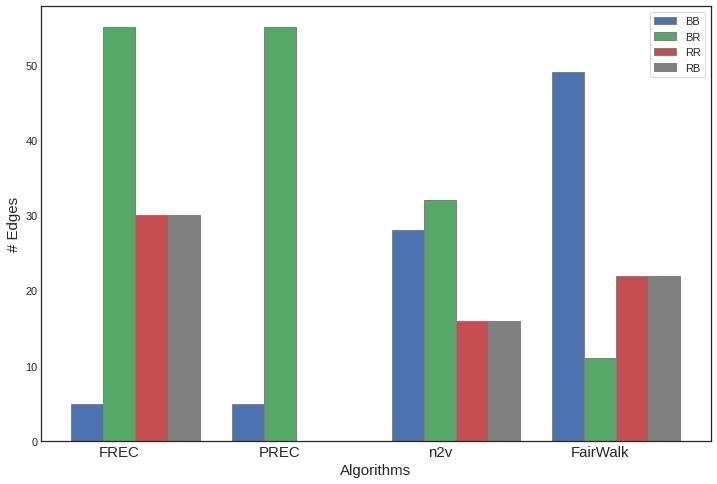

In [159]:
plt.style.use('seaborn-white')
plot_edges_pair_color("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


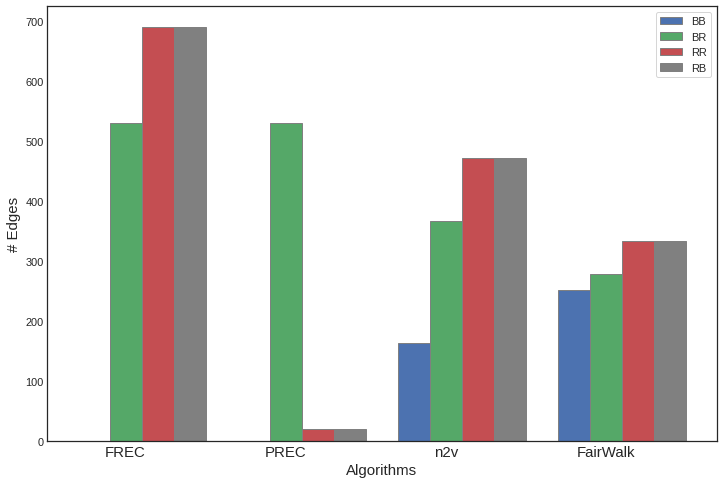

In [160]:
plot_edges_pair_color("blogs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


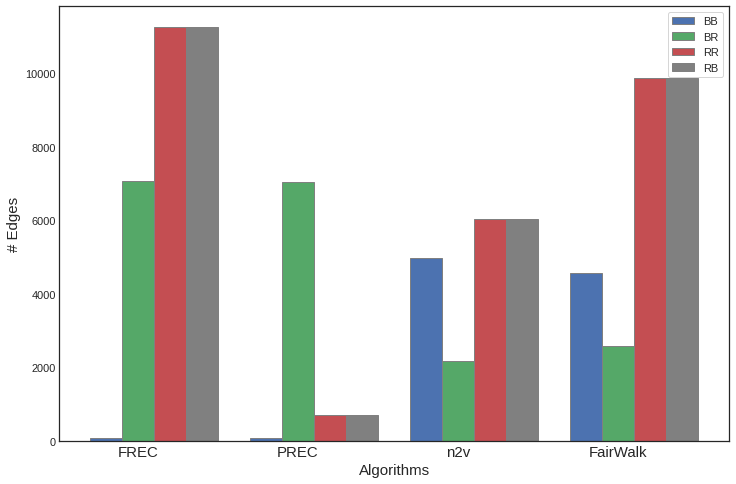

In [161]:
plot_edges_pair_color("twitter")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


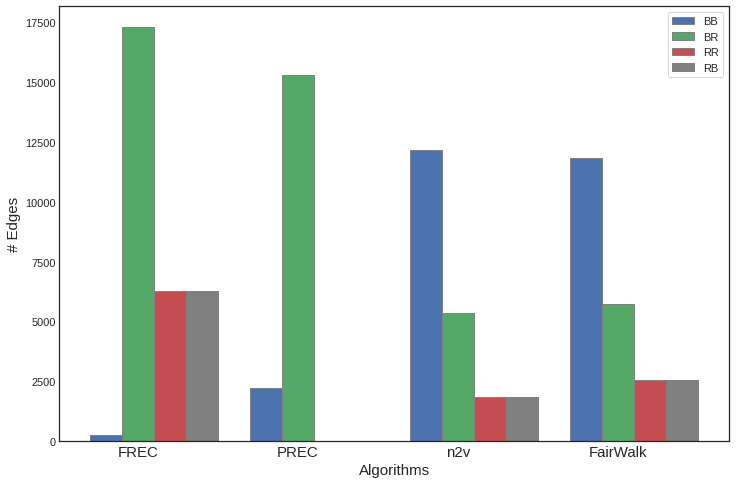

In [162]:
plot_edges_pair_color("dblp_new_gender", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


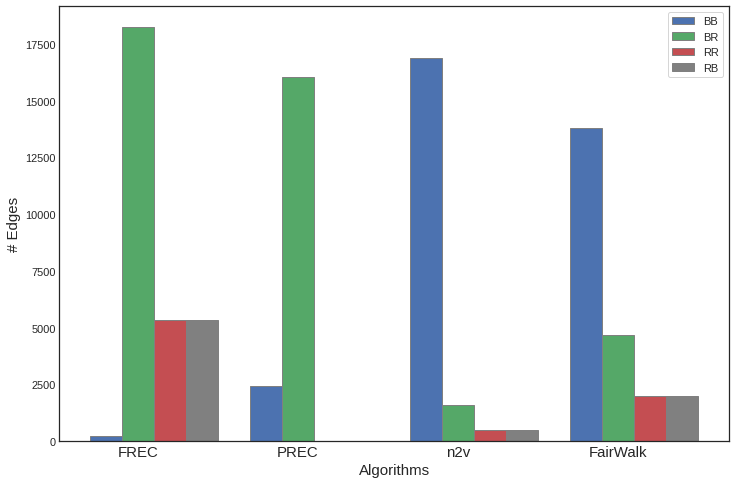

In [163]:
plot_edges_pair_color("dblp_new_pubs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

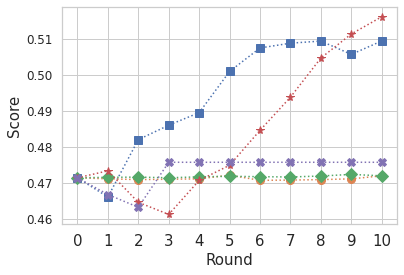

In [105]:
plot_scores("books", figure2_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

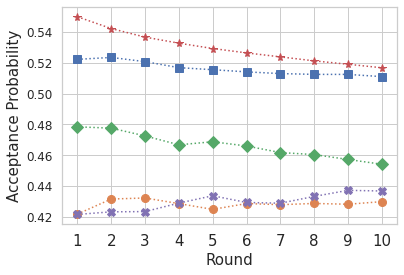

In [106]:
plot_accept_prob("books", figure2_prob_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

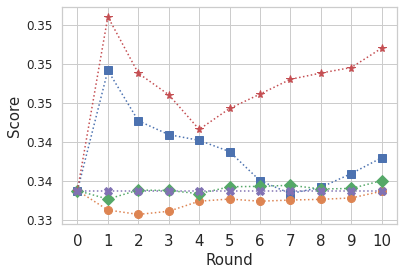

In [107]:
plot_scores("blogs", figure2_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

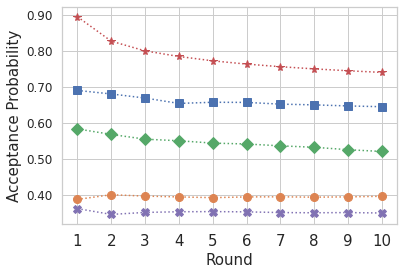

In [108]:
plot_accept_prob("blogs", figure2_prob_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

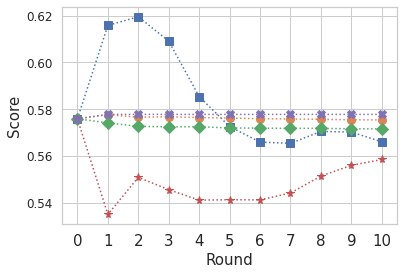

In [109]:
plot_scores("twitter",figure2_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

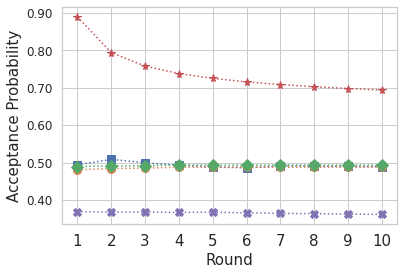

In [110]:
plot_accept_prob("twitter", figure2_prob_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

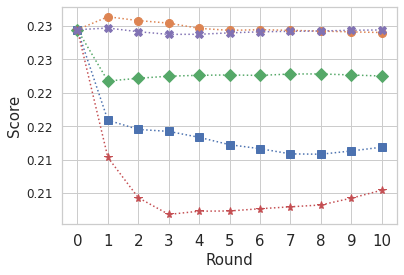

In [111]:
plot_scores("dblp_new_pubs", figure2_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

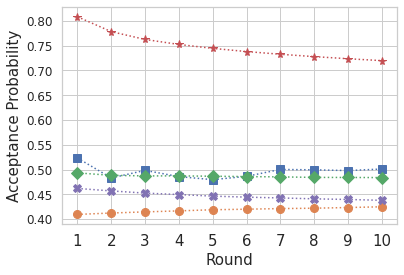

In [112]:
plot_accept_prob("dblp_new_pubs", figure2_prob_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

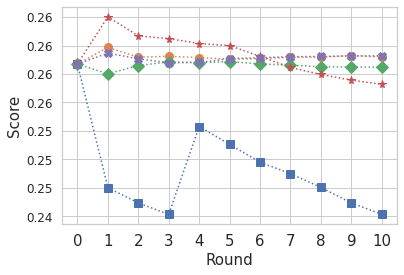

In [113]:
plot_scores("dblp_new_gender", figure2_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed i

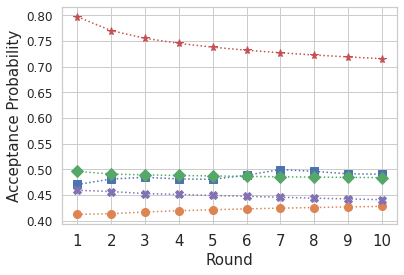

In [114]:
plot_accept_prob("dblp_new_gender", figure2_prob_files)

## Our algorithms

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


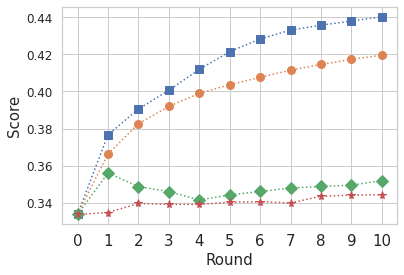

In [115]:
plot_scores("blogs", figure4_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


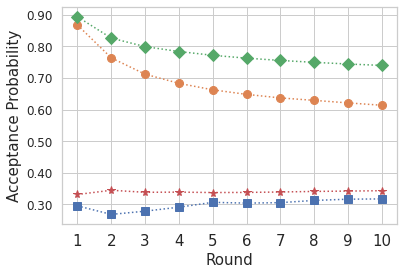

In [116]:
plot_accept_prob("blogs", figure4_prob_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


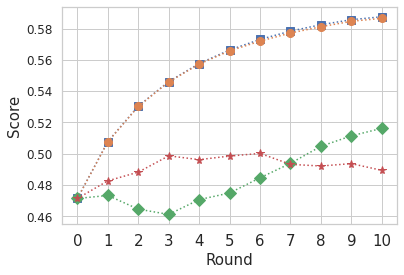

In [117]:
plot_scores("books", figure4_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


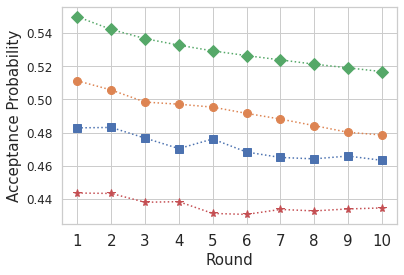

In [118]:
plot_accept_prob("books", figure4_prob_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


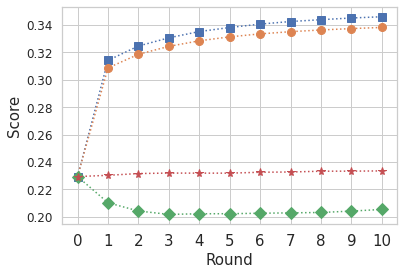

In [119]:
plot_scores("dblp_new_pubs", figure4_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


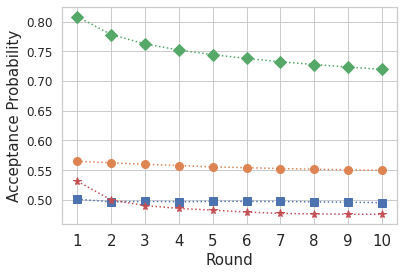

In [120]:
plot_accept_prob("dblp_new_pubs", figure4_prob_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


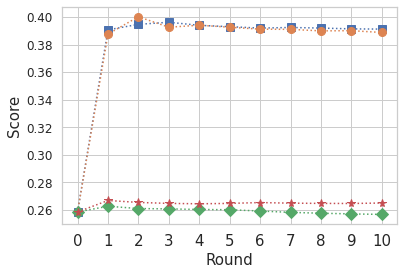

In [121]:
plot_scores("dblp_new_gender", figure4_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


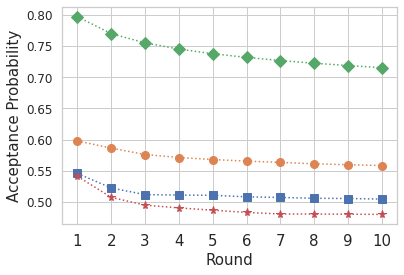

In [122]:
plot_accept_prob("dblp_new_gender", figure4_prob_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


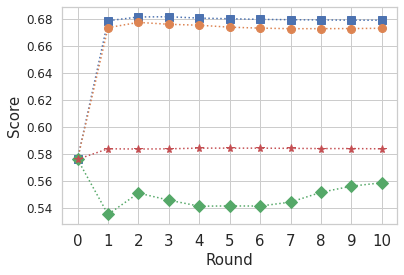

In [123]:
plot_scores("twitter", figure4_files, prune_first=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


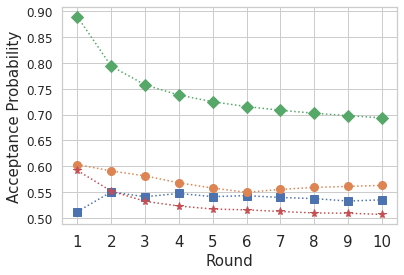

In [124]:
plot_accept_prob("twitter", figure4_prob_files, prune_first=False)

## Personalized

In [125]:
figure_personalized_files = ["sc_personalized_dyadic_fair.csv", "sc_personalized_hybrid_balanced_node2vec.csv",
                             "sc_personalized_node2vec.csv", "sc_personalized_fairwalk.csv"]
figure_prec_files = ["sc_dyadic_fair.csv", "sc_hybrid_balanced_node2vec.csv"]
figure_personalized_names = ["PREC", "E_PREC", "n2v", "FairWalk"]

In [126]:
def plot_personalized_scores(dataset, scores_files):
    al = 0
    for sf in scores_files:
        scores = []
        rounds = [j for j in range(-1, 10)]
        for i in range(-1, 10):
            df = pd.read_csv(dataset + "/" + sf + "_round_" + str(i) + ".csv", sep="\t")
            score = df["Red Personalized Pagerank"].mean()
            scores.append(score)
        ax = plt.gca()
        yScalarFormatter = ScalarFormatterClass(useMathText=True)
        ax.yaxis.set_major_formatter(yScalarFormatter)
        name = figure_personalized_names[al]
        plt.plot(rounds, scores, label=name, linestyle=':', marker=markers[al], ms=8)
        plt.ylabel('Score', fontsize=15)
        plt.xlabel('Round', fontsize=15)
        plt.xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
        plt.yticks(fontsize=12)
        plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 4)
        if DISABLE_LEGEND:
            plt.legend('', frameon=False)
        plt.savefig("figures/" + dataset + "_perso_.png", dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None, metadata=None)
        al+= 1

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


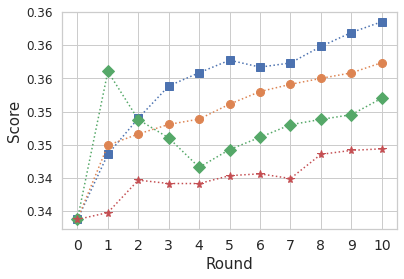

In [127]:
plot_personalized_scores("blogs", figure_personalized_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


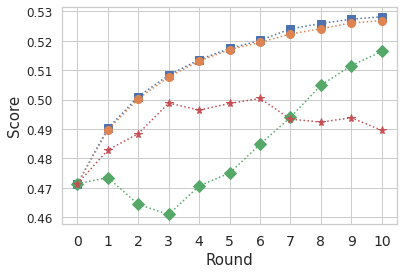

In [128]:
plot_personalized_scores("books", figure_personalized_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


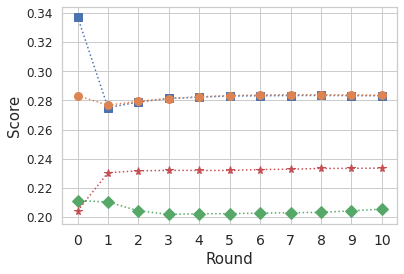

In [129]:
plot_personalized_scores("dblp_new_pubs", figure_personalized_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


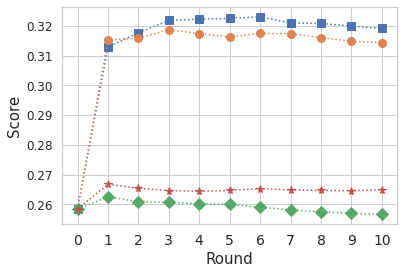

In [130]:
plot_personalized_scores("dblp_new_gender", figure_personalized_files)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


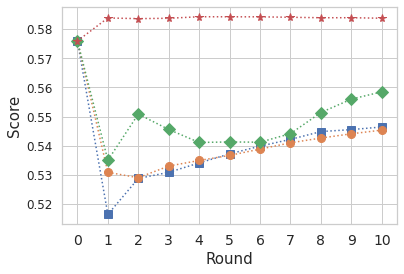

In [131]:
plot_personalized_scores("twitter", figure_personalized_files)

In [ ]:
plot_unique_targets("books")

In [ ]:
plot_unique_targets("blogs")

In [ ]:
plot_unique_targets("twitter")

In [ ]:
plot_unique_targets("dblp_course")

In [ ]:
dataset = "books"
sf = "sc_fair.csv"
df = pd.read_csv(dataset + "/" + sf)
df